In [1]:
from qiskit import *
from qiskit.circuit.library import QFT
import numpy as np
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import matplotlib as mpl
import copy as cp
mpl.rcParams.update(mpl.rcParamsDefault)

from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, \
Estimator, Session, Options

service = QiskitRuntimeService(channel='ibm_quantum')
IBMQ.save_account("3a96a81d0c023c892178af8b27b75cefd4e37cc77cba3220d645e34a78b3dc6c7d7d7b9db9a77f342095fea3baf64791aa58deccd8e4e07bfcc6310da89873f5", overwrite=True)
IBMQ.load_account()

/tmp/ipykernel_269/824086492.py:14: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.save_account("3a96a81d0c023c892178af8b27b75cefd4e37cc77cba3220d645e34a78b3dc6c7d7d7b9db9a77f342095fea3baf64791aa58deccd8e4e07bfcc6310da89873f5", overwrite=True)
/tmp/ipykernel_269/824086492.py:14: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account("3a96a81d0c023c892178af

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [2]:
provider = IBMQ.get_provider("ibm-q")
#provider.backends()

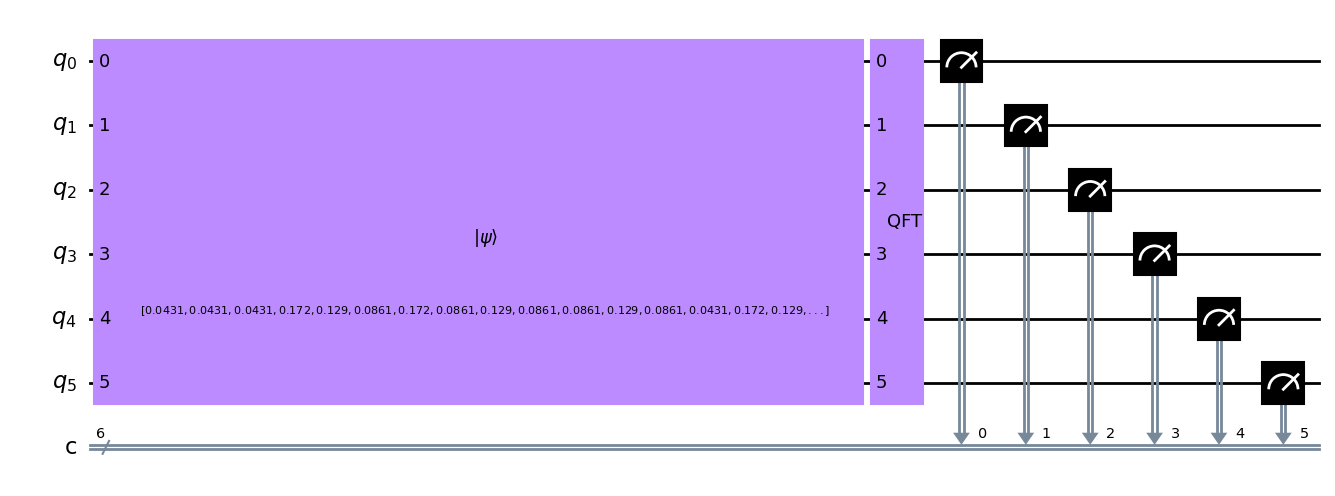

In [9]:
sequence = "AAATGCTCGCCGCATGCTCTGATGTAGTAGTCCCATGCTTTTGCTATGCTATGCTACAGTACTG"

conversion = {"A": 1, "C": 2, "G": 3, "T": 4}

numeric_sequence = [conversion[i] for i in sequence]
alpha = numeric_sequence

alpha = alpha/np.linalg.norm(alpha)
q = QuantumRegister(6,'q') 
c = ClassicalRegister(6,'c') 
qc = QuantumCircuit(q,c)
qc.initialize(alpha)
qft = QFT(num_qubits=6, do_swaps=True).to_gate()
qc.append(qft, qargs=[0, 1, 2, 3, 4, 5])
qc.measure(range(6), range(6))
#qc.draw('mpl').savefig('/home/jovyan/My_Notebooks/Images/qTest_2_0.png')
qc.draw('mpl')

In [4]:
machine = provider.get_backend('ibm_perth')

In [5]:
import qiskit.tools.jupyter
%qiskit_job_watcher
job = execute(qc, machine, shots=64)

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [6]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


In [7]:
result = job.result()
print(result.get_counts(qc))

{'010000': 1, '010001': 3, '010010': 1, '010011': 1, '010110': 2, '010111': 3, '011001': 1, '011010': 2, '011011': 2, '011100': 1, '011101': 1, '011110': 1, '000010': 1, '100000': 1, '100001': 3, '100010': 1, '100011': 1, '100110': 2, '100111': 1, '101000': 1, '101010': 3, '101011': 1, '101100': 1, '101110': 1, '101111': 1, '110000': 2, '110001': 1, '110011': 2, '110101': 2, '110111': 1, '111000': 1, '111011': 1, '111100': 2, '000100': 1, '000101': 1, '000111': 1, '001000': 3, '001001': 2, '001011': 2, '001100': 2, '001111': 3}


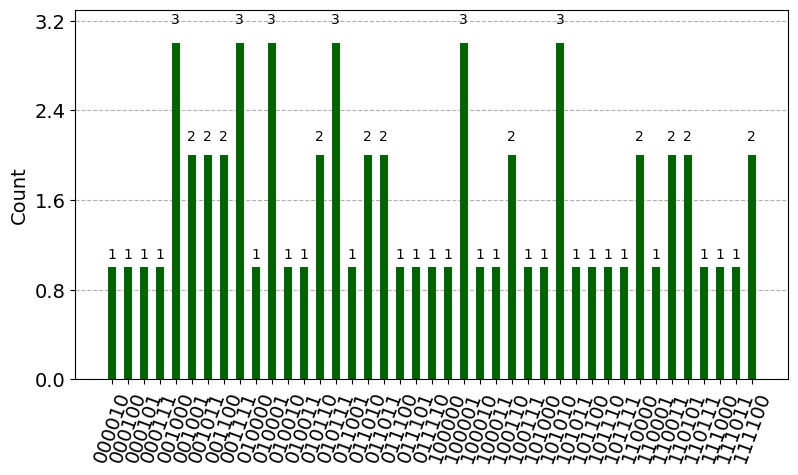

In [8]:
plot_histogram(result.get_counts(qc), color="darkgreen", title=r"", figsize=(9.2, 4.8))

In [10]:
%qiskit_job_watcher
job2 = execute(qc, machine, shots=128)

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

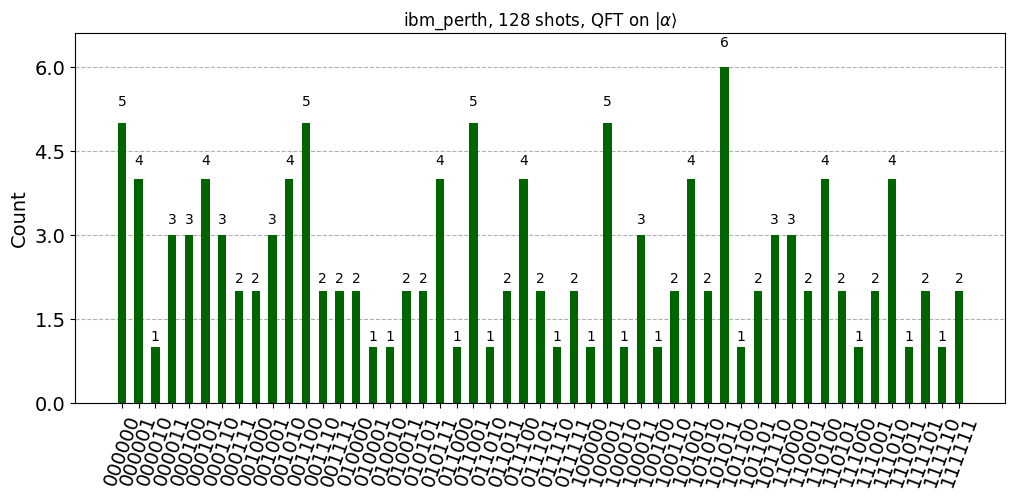

In [14]:
result2 = job2.result()
#plot_histogram(result2.get_counts(qc), color="darkgreen", title=r"", figsize=(9.2, 4.8))
plot_histogram(result2.get_counts(qc), color="darkgreen", title=r"ibm_perth, 128 shots, QFT on $|\alpha\rightangle$", figsize=(12, 4.8))